In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
df = pd.read_csv('stroke_data.csv')

In [ ]:
df.head()

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
df.corr()['stroke']

In [ ]:
df_encoded = pd.get_dummies(df.work_type)

In [ ]:
df_encoded.shape

In [ ]:
smk = SMOTETomek(random_state = 42)


In [ ]:
df = pd.concat([df,df_encoded],axis=1)

In [ ]:
df.Residence_type.unique()

In [ ]:
df.drop('work_type',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

In [ ]:
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
df['ever_married'] = le.fit_transform(df['ever_married'])

In [ ]:
df.head()

In [ ]:
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [ ]:
df.head()

In [ ]:
df.corr()['stroke']

In [ ]:
df.describe().transpose()

In [ ]:
df.smoking_status.unique()

In [ ]:
df_smoking = pd.get_dummies(df.smoking_status)

In [ ]:
df = pd.concat([df,df_smoking],axis=1)

In [ ]:
df.drop('smoking_status',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.describe().transpose()

In [ ]:
column_list = df.columns.tolist()
column_list.remove('stroke')
column_list

In [ ]:
x = df[column_list]
x

In [ ]:
y = df['stroke']
y

In [ ]:
# Up Sampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
x_res,y_res = smk.fit_sample(x,y)

In [ ]:
x_res

In [ ]:
x_res = pd.DataFrame(x_res,columns=column_list)

In [ ]:
y_res = pd.DataFrame(y_res,columns=['stroke'])

In [ ]:
x_res

In [ ]:
y_res

In [ ]:
df_new = pd.concat([x_res,y_res],axis=1)

In [ ]:
df_new.head()

In [ ]:
sns.countplot(x='stroke',data=df_new)

In [ ]:
X = df_new.drop('stroke',axis=1).values
y = df_new['stroke'].values

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()


model.add(Dense(units=100,activation='relu'))

model.add(Dense(units=50,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
1335/1335 [==============================] - 5s 3ms/step - loss: 0.3945 - val_loss: 0.2307
Epoch 2/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.2089 - val_loss: 0.1619
Epoch 3/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1680 - val_loss: 0.1660
Epoch 4/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1516 - val_loss: 0.1358
Epoch 5/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1374 - val_loss: 0.1244
Epoch 6/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1267 - val_loss: 0.1142
Epoch 7/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1237 - val_loss: 0.1380
Epoch 8/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1241 - val_loss: 0.1058
Epoch 9/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1155 - val_loss: 0.1242
Epoch 10/600
1335/1335 [==============================] - 3s 2ms/step - l

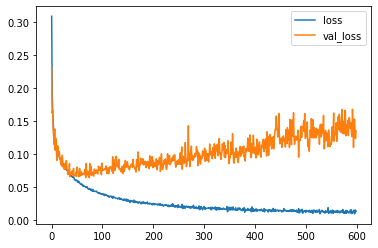

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=250)

In [ ]:
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,stroke
0,1.0,58.0,1.0,0.0,1.0,1.0,87.96,39.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,70.0,0.0,0.0,1.0,0.0,69.04,35.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,52.0,0.0,0.0,1.0,1.0,77.59,17.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,75.0,0.0,1.0,1.0,0.0,243.53,27.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.0,32.0,0.0,0.0,1.0,0.0,77.67,32.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
model = Sequential()

model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
1335/1335 [==============================] - 4s 2ms/step - loss: 0.3902 - val_loss: 0.2924
Epoch 2/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.2133 - val_loss: 0.1667
Epoch 3/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1744 - val_loss: 0.1442
Epoch 4/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1574 - val_loss: 0.1387
Epoch 5/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1418 - val_loss: 0.1560
Epoch 6/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1345 - val_loss: 0.1246
Epoch 7/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1297 - val_loss: 0.1122
Epoch 8/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1243 - val_loss: 0.1136
Epoch 9/600
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1188 - val_loss: 0.1195
Epoch 10/600
1335/1335 [==============================] - 3s 2ms/step - l

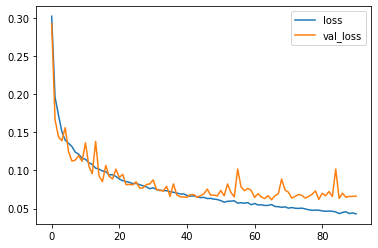

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7142
           1       0.99      0.97      0.98      7092

    accuracy                           0.98     14234
   macro avg       0.98      0.98      0.98     14234
weighted avg       0.98      0.98      0.98     14234



In [ ]:
print(confusion_matrix(y_test,predictions))

[[7054   88]
 [ 201 6891]]
